In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [21]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [22]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [23]:
X, y = data.data, data.target

In [24]:
X = pd.DataFrame(X, columns=data.feature_names)
y = pd.DataFrame(y)

In [25]:
X.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [26]:
y.head(2)

,0
0,0
1,0


In [27]:
# let's perform only XGboost here 

In [28]:
from xgboost import XGBRFClassifier, XGBClassifier
xgbr = XGBRFClassifier()
xg = XGBClassifier()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [30]:
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
def metricss(y_test, y_pred):
    print("classification report : \n", classification_report(y_test, y_pred))
    print("Confusion Matrix : ",confusion_matrix(y_test, y_pred) )

In [33]:
metricss(y_pred, y_test)

classification report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.98      0.97      0.98        66

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix :  [[47  1]
 [ 2 64]]


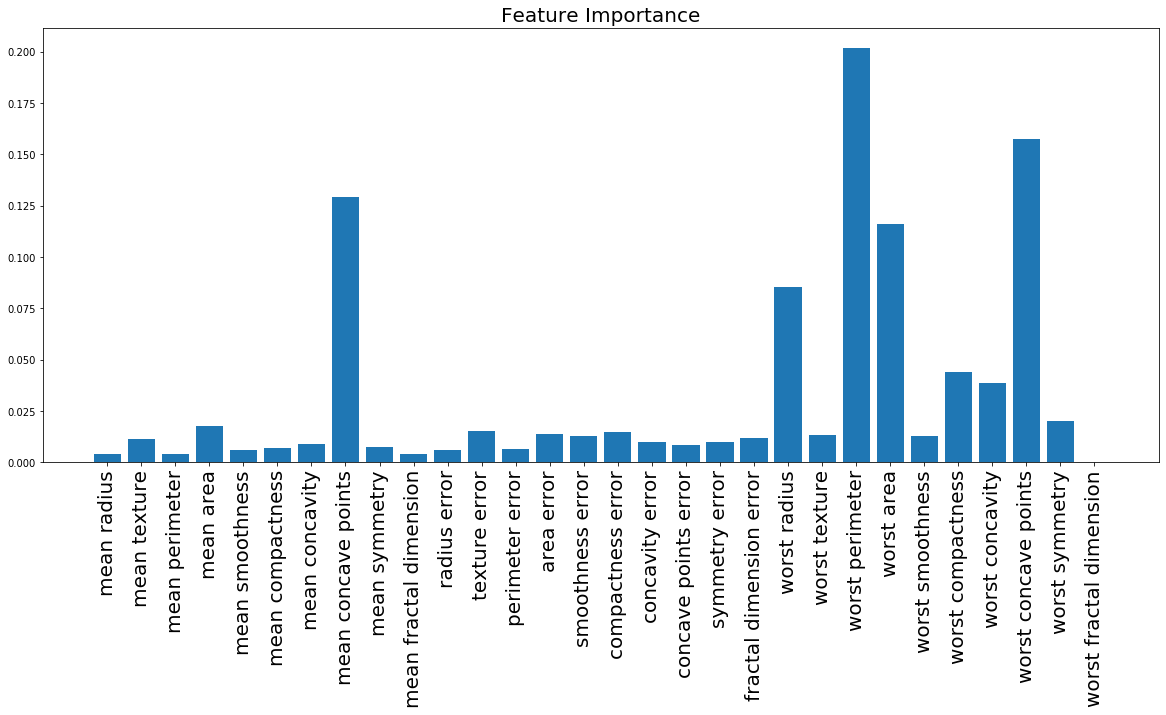

In [50]:
plt.figure(figsize=(20,8))
plt.bar( data.feature_names, xgbr.feature_importances_)
plt.xticks(rotation='vertical', size=20)
plt.title('Feature Importance',  size=20)
plt.show()

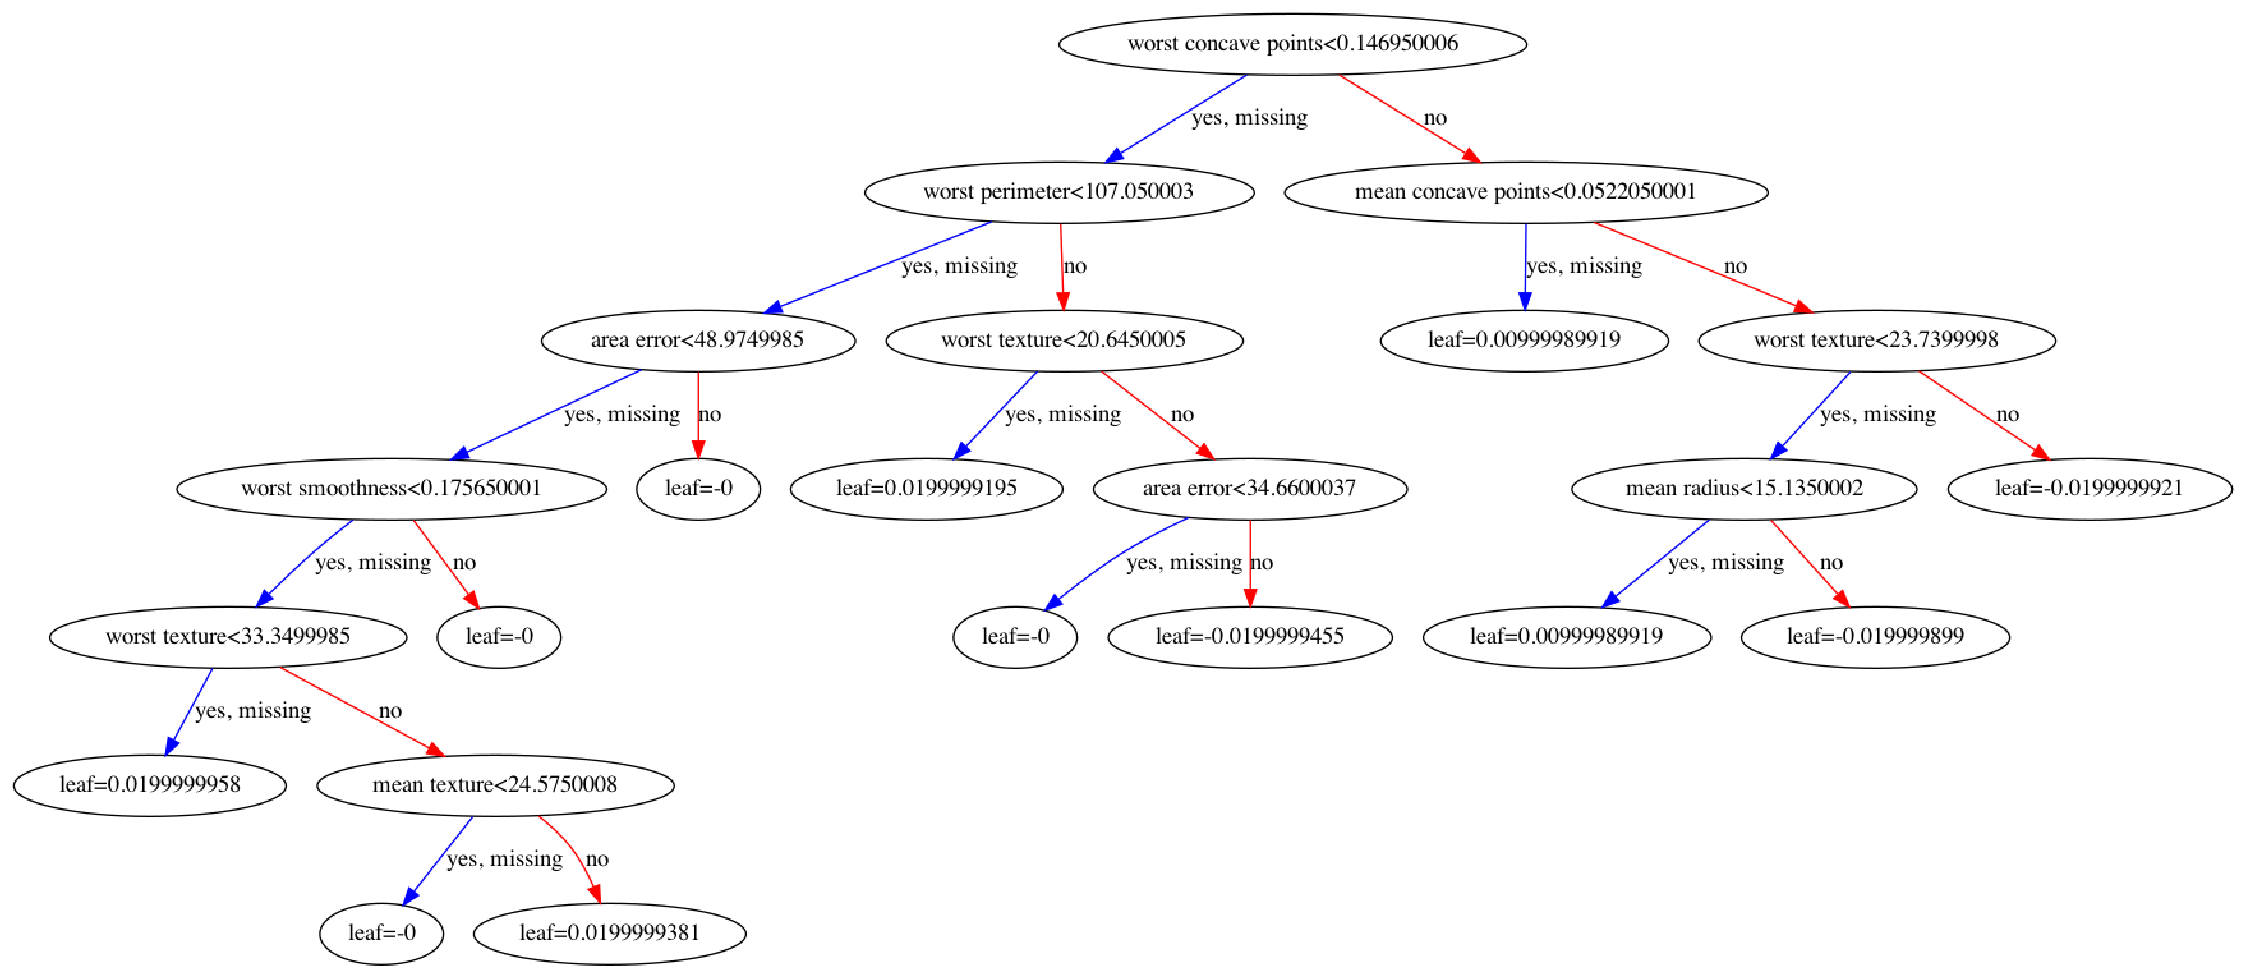

In [57]:
import xgboost as xgb
fig, ax = plt.subplots(figsize=(40, 40))
xgb.plot_tree(xgbr, num_trees=1, ax=ax)
plt.savefig("temp.jpg")
plt.show()

<Figure size 2160x2160 with 0 Axes>

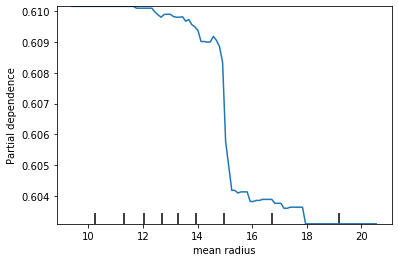

<Figure size 2160x2160 with 0 Axes>

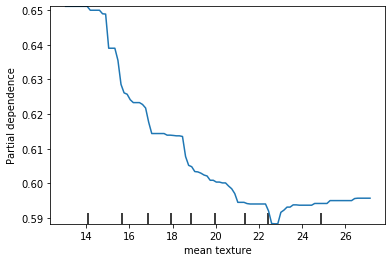

<Figure size 2160x2160 with 0 Axes>

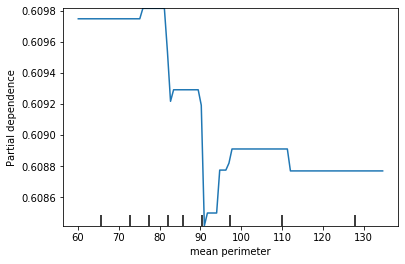

<Figure size 2160x2160 with 0 Axes>

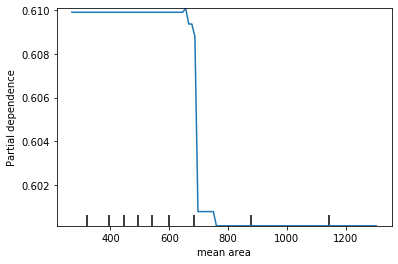

<Figure size 2160x2160 with 0 Axes>

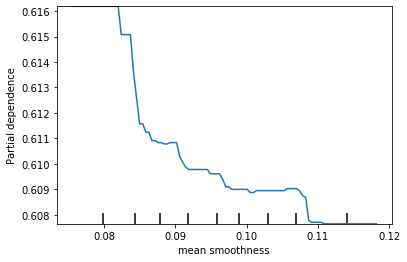

<Figure size 2160x2160 with 0 Axes>

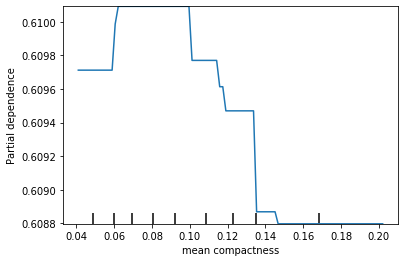

<Figure size 2160x2160 with 0 Axes>

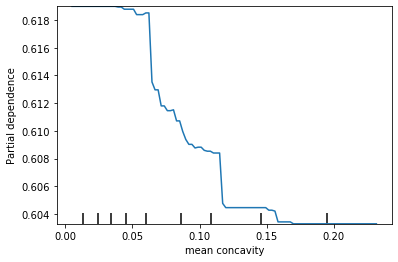

<Figure size 2160x2160 with 0 Axes>

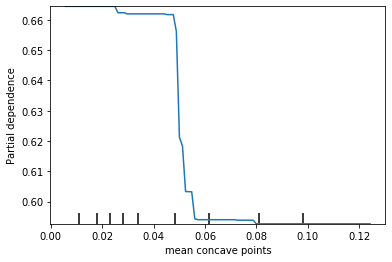

<Figure size 2160x2160 with 0 Axes>

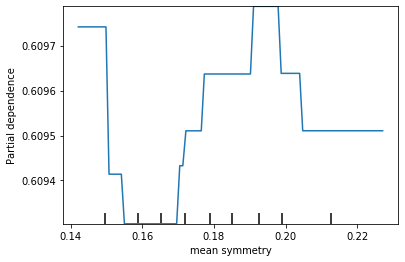

<Figure size 2160x2160 with 0 Axes>

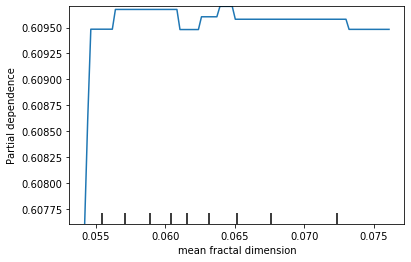

<Figure size 2160x2160 with 0 Axes>

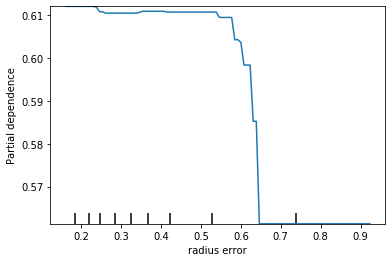

<Figure size 2160x2160 with 0 Axes>

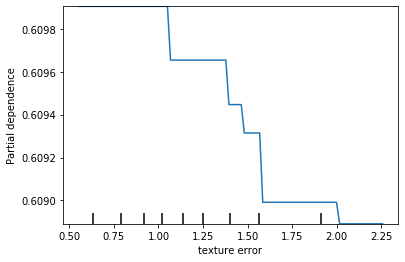

<Figure size 2160x2160 with 0 Axes>

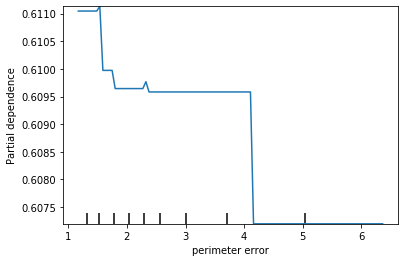

<Figure size 2160x2160 with 0 Axes>

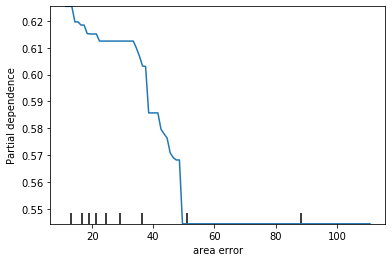

<Figure size 2160x2160 with 0 Axes>

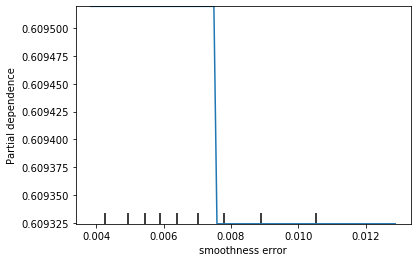

<Figure size 2160x2160 with 0 Axes>

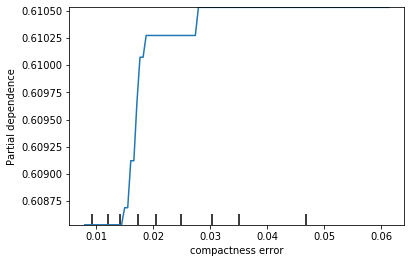

<Figure size 2160x2160 with 0 Axes>

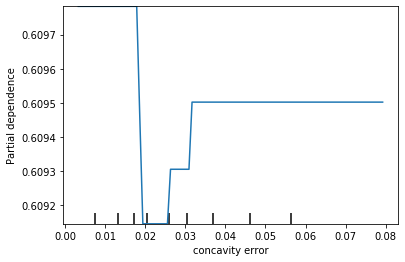

<Figure size 2160x2160 with 0 Axes>

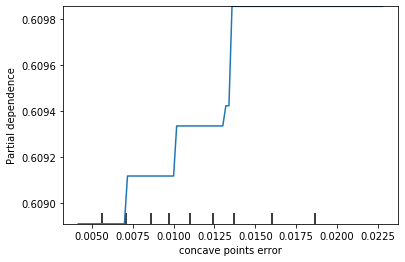

<Figure size 2160x2160 with 0 Axes>

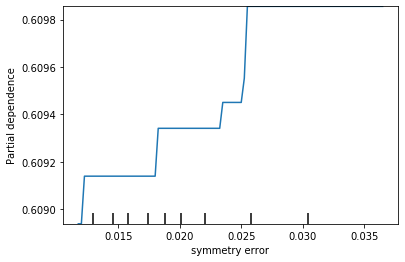

<Figure size 2160x2160 with 0 Axes>

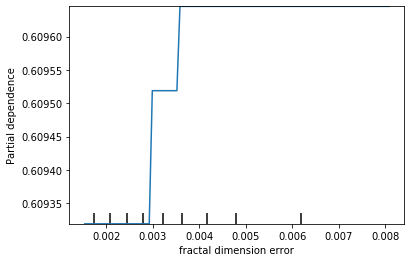

<Figure size 2160x2160 with 0 Axes>

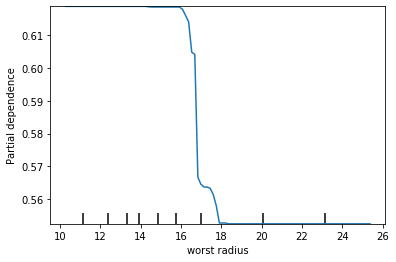

<Figure size 2160x2160 with 0 Axes>

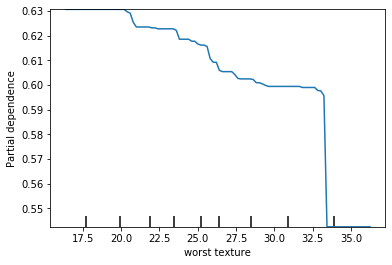

<Figure size 2160x2160 with 0 Axes>

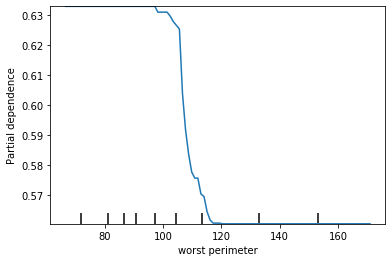

<Figure size 2160x2160 with 0 Axes>

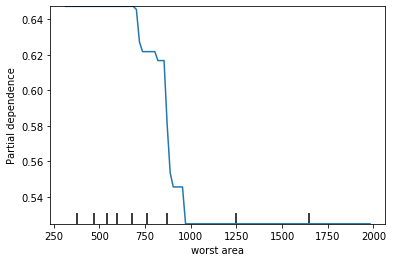

<Figure size 2160x2160 with 0 Axes>

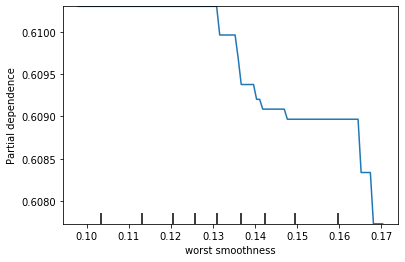

<Figure size 2160x2160 with 0 Axes>

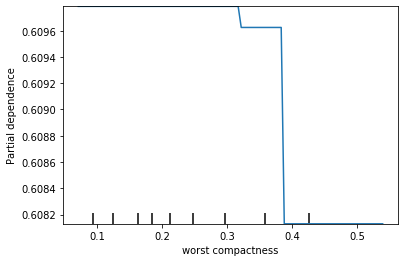

<Figure size 2160x2160 with 0 Axes>

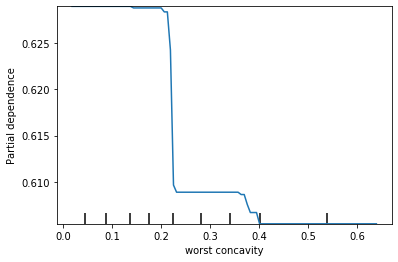

<Figure size 2160x2160 with 0 Axes>

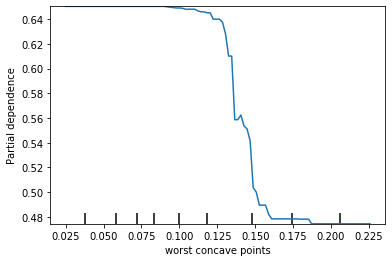

<Figure size 2160x2160 with 0 Axes>

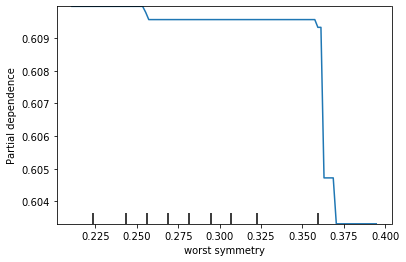

/usr/local/lib/python3.7/site-packages/sklearn/inspection/_plot/partial_dependence.py:582: UserWarning: Attempting to set identical bottom == top == 0.6094706654548645 results in singular transformations; automatically expanding.
  axi.set_ylim(self.pdp_lim[1])


<Figure size 2160x2160 with 0 Axes>

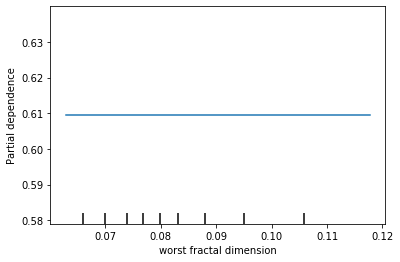

In [58]:
from sklearn.inspection import plot_partial_dependence
X_train = pd.DataFrame(X_train, columns=list(data.feature_names))
for i in data.feature_names:
    plt.figure(figsize=(30,30))
    plot_partial_dependence(xgbr,X_train,features= [i], grid_resolution=100)  
    plt.show()

In [60]:
# let's do some hyperparameter tunning 

In [61]:
param = {
    "eta":[0.01, 0.1, 1,0.001],
    "min_child_weight": [1, 2, 3],
    "max_depth": [4,5,6,7,8,10,13],
    "max_leaf_nodes":[20,10,15],
    "gamma":[0.01, 0.1, 1,0.001],
    "alpha":[0.01, 0.1, 1,0.001]
    
}

In [62]:
from sklearn.model_selection import RandomizedSearchCV
best = RandomizedSearchCV(XGBRFClassifier(), param_distributions=param, cv=5)
best.fit(X_train , y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[09:27:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { max_leaf_nodes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:27:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { max_leaf_nodes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:27:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { max_leaf_nodes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[09:27:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { max_leaf_nodes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:27:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { max_leaf_nodes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:27:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { max_leaf_nodes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[09:27:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { max_leaf_nodes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:27:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { max_leaf_nodes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRFClassifier(base_score=None, booster=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None, gamma=None,
                                             gpu_id=None,
                                             importance_type='gain',
                                             interaction_constraints=None,
                                             max_delta_step=None,
                                             max_depth=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=100, n_jobs=None,
                                             num_parallel_tree=None,
                                             objective='binary:logistic',
                                             rand

In [64]:
metricss(y_test,best.predict(X_test))

classification report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        49
           1       0.97      0.98      0.98        65

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix :  [[47  2]
 [ 1 64]]


<Figure size 2160x2160 with 0 Axes>

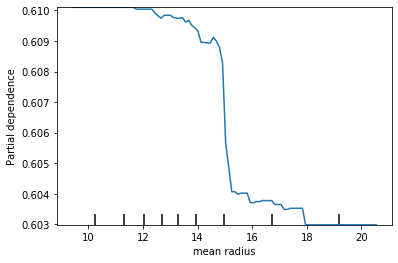

<Figure size 2160x2160 with 0 Axes>

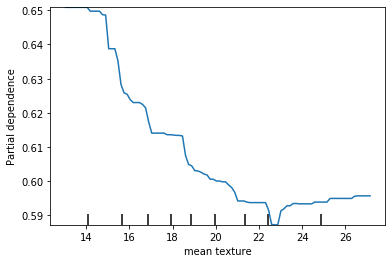

<Figure size 2160x2160 with 0 Axes>

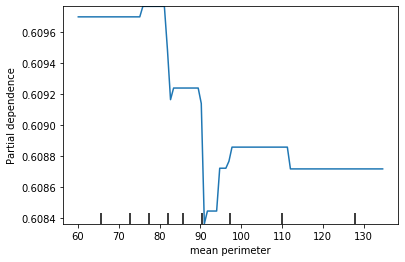

<Figure size 2160x2160 with 0 Axes>

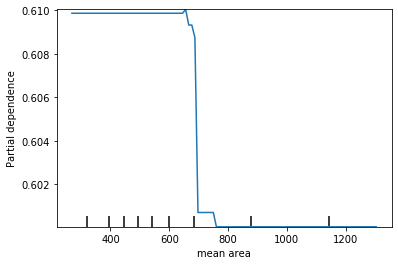

<Figure size 2160x2160 with 0 Axes>

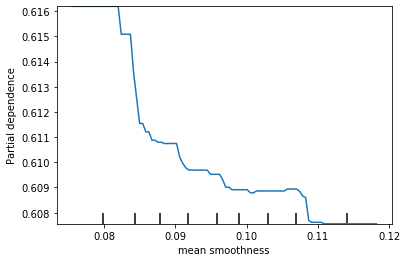

<Figure size 2160x2160 with 0 Axes>

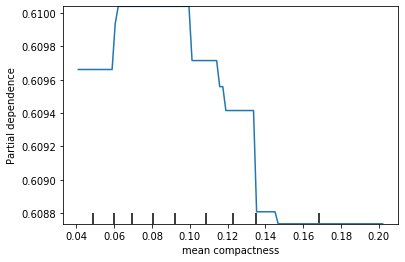

<Figure size 2160x2160 with 0 Axes>

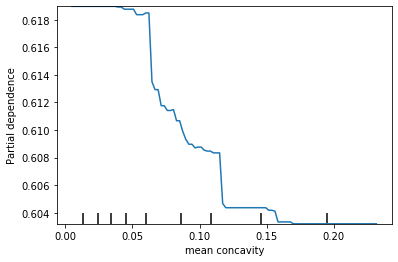

<Figure size 2160x2160 with 0 Axes>

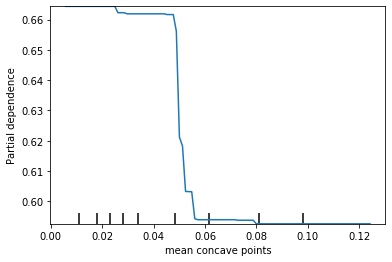

<Figure size 2160x2160 with 0 Axes>

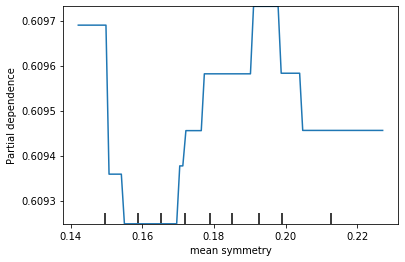

<Figure size 2160x2160 with 0 Axes>

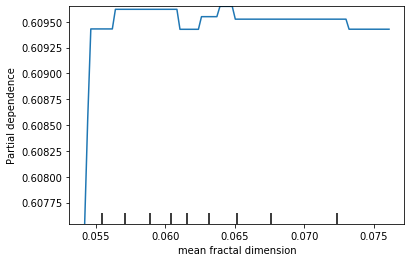

<Figure size 2160x2160 with 0 Axes>

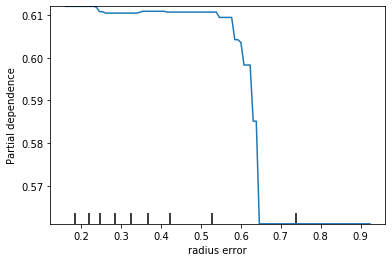

<Figure size 2160x2160 with 0 Axes>

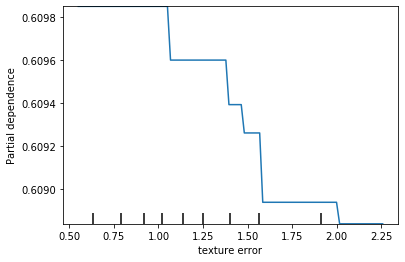

<Figure size 2160x2160 with 0 Axes>

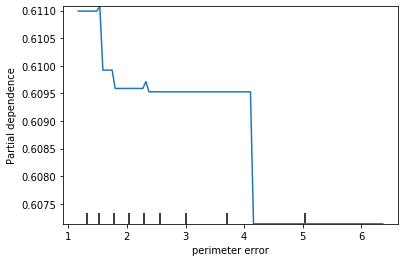

<Figure size 2160x2160 with 0 Axes>

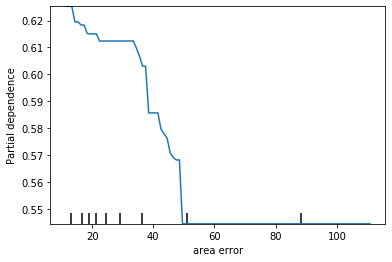

<Figure size 2160x2160 with 0 Axes>

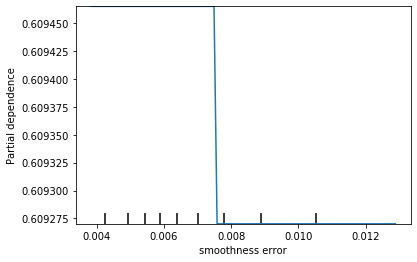

<Figure size 2160x2160 with 0 Axes>

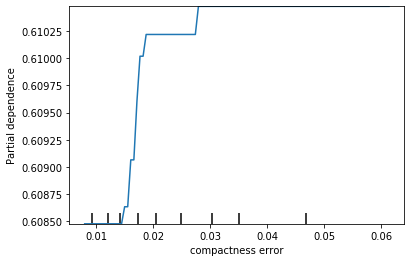

<Figure size 2160x2160 with 0 Axes>

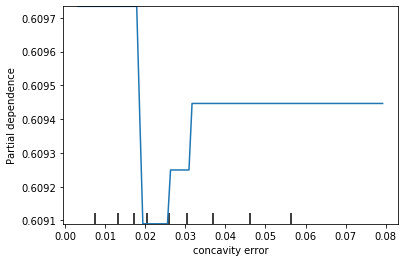

<Figure size 2160x2160 with 0 Axes>

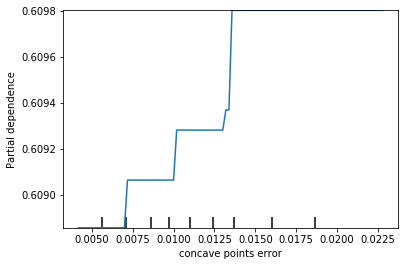

<Figure size 2160x2160 with 0 Axes>

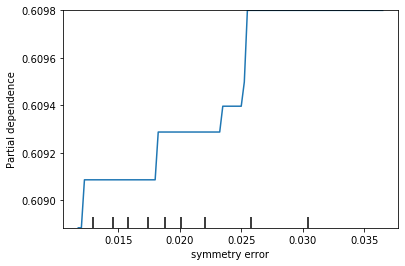

<Figure size 2160x2160 with 0 Axes>

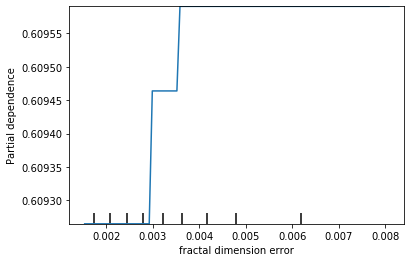

<Figure size 2160x2160 with 0 Axes>

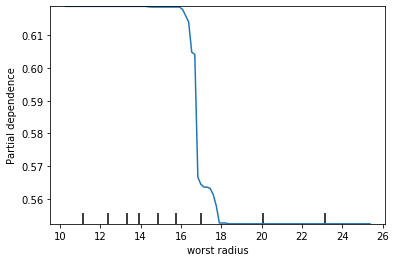

<Figure size 2160x2160 with 0 Axes>

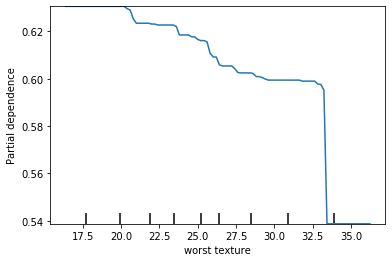

<Figure size 2160x2160 with 0 Axes>

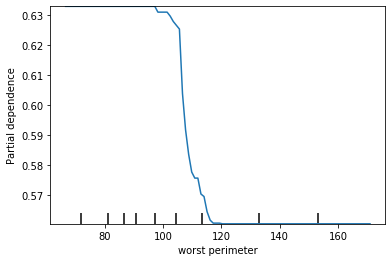

<Figure size 2160x2160 with 0 Axes>

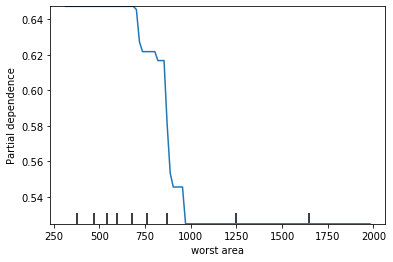

<Figure size 2160x2160 with 0 Axes>

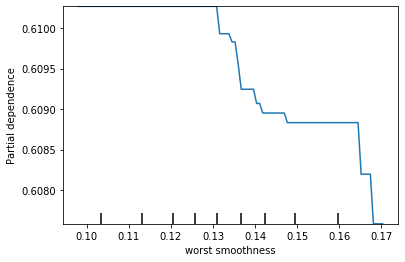

<Figure size 2160x2160 with 0 Axes>

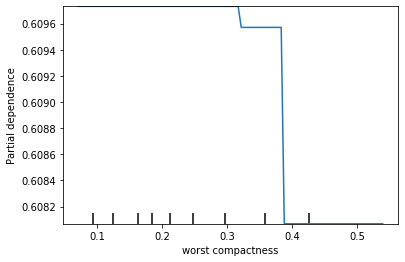

<Figure size 2160x2160 with 0 Axes>

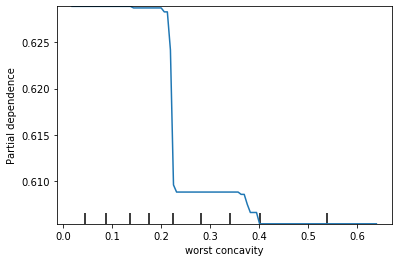

<Figure size 2160x2160 with 0 Axes>

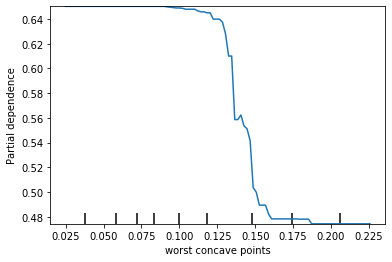

<Figure size 2160x2160 with 0 Axes>

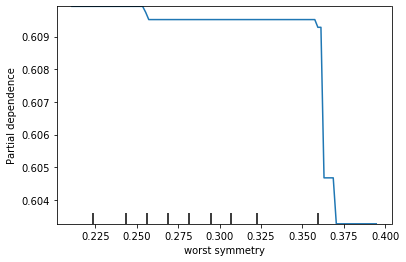

/usr/local/lib/python3.7/site-packages/sklearn/inspection/_plot/partial_dependence.py:582: UserWarning: Attempting to set identical bottom == top == 0.6094162464141846 results in singular transformations; automatically expanding.
  axi.set_ylim(self.pdp_lim[1])


<Figure size 2160x2160 with 0 Axes>

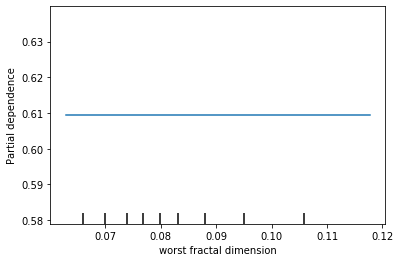

In [65]:
from sklearn.inspection import plot_partial_dependence
X_train = pd.DataFrame(X_train, columns=list(data.feature_names))
for i in data.feature_names:
    plt.figure(figsize=(30,30))
    plot_partial_dependence(best.best_estimator_,X_train,features= [i], grid_resolution=100)  
    plt.show()

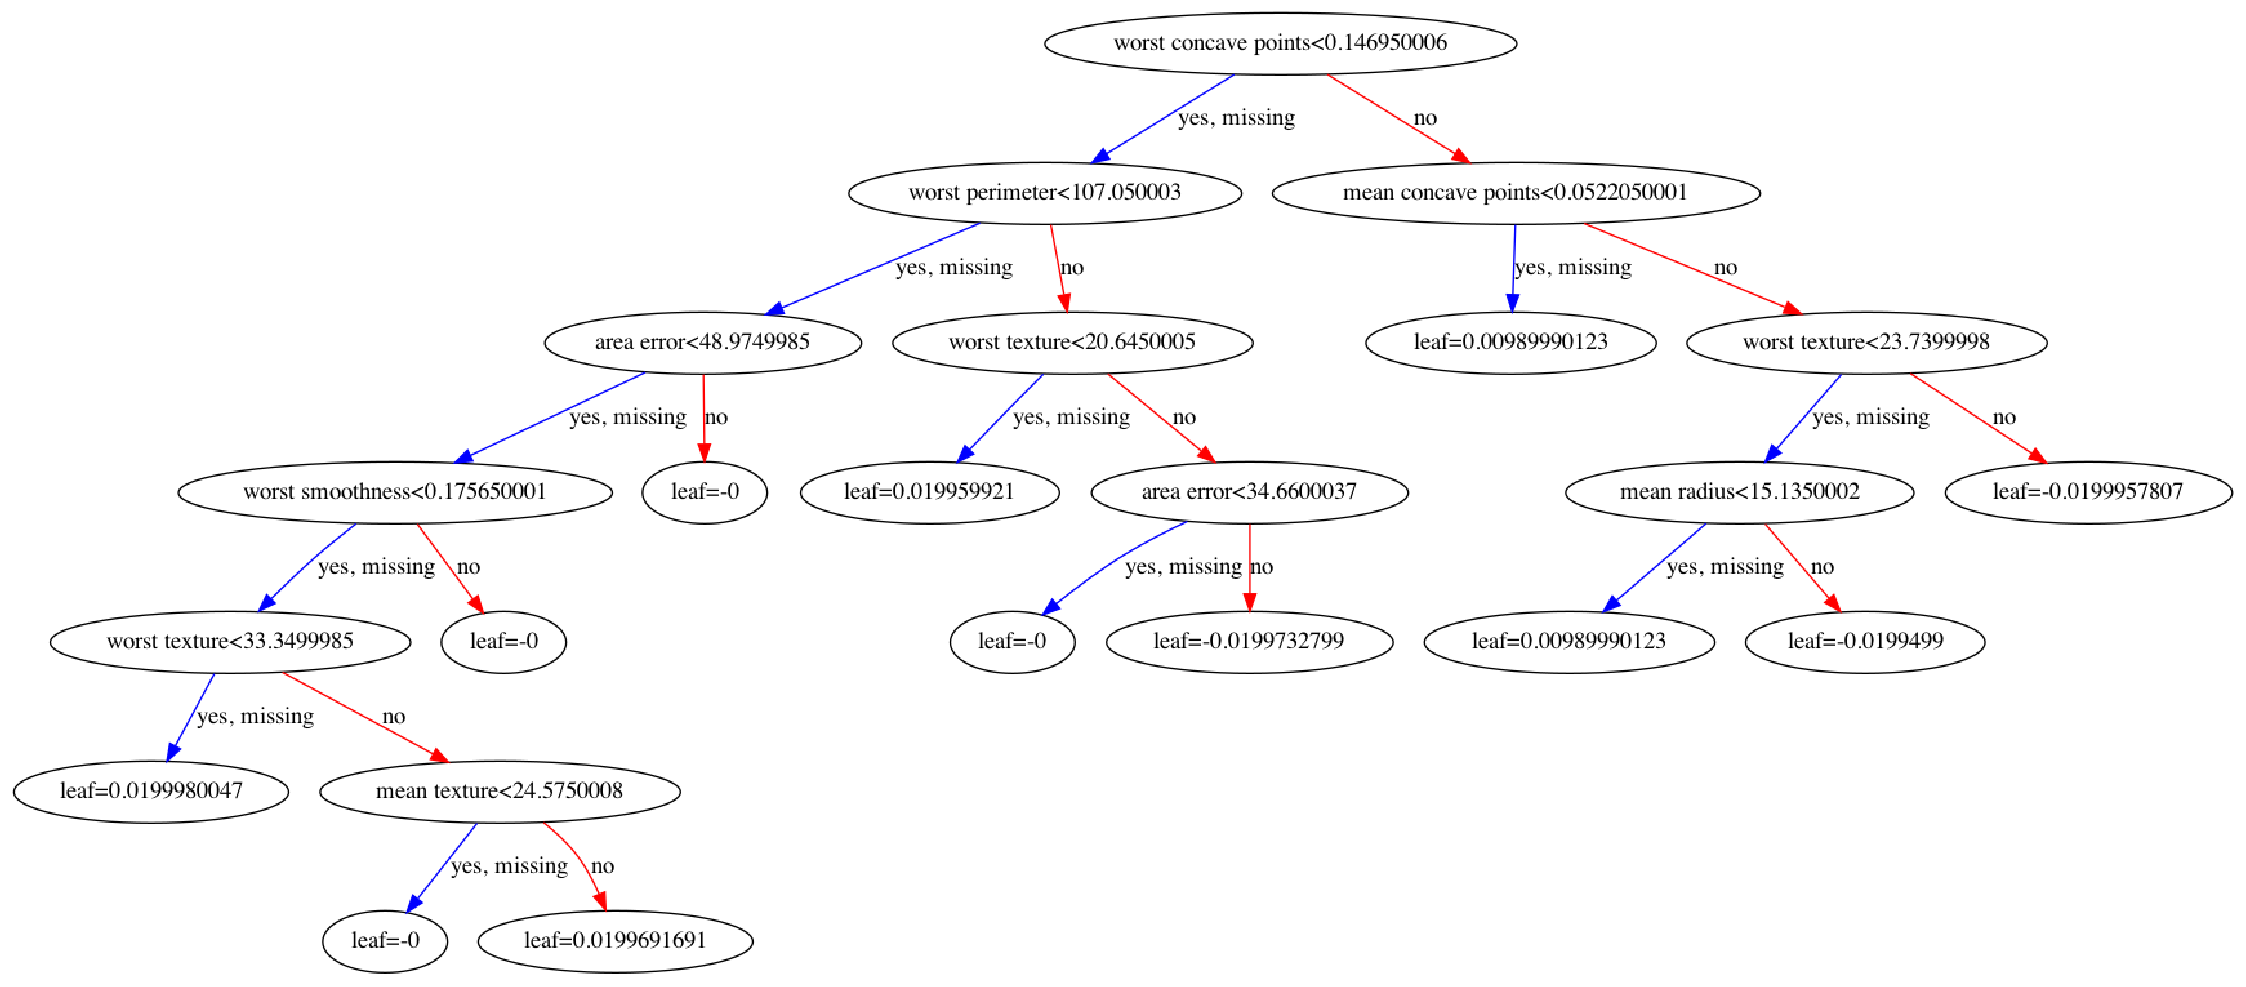

In [66]:
import xgboost as xgb
fig, ax = plt.subplots(figsize=(40, 40))
xgb.plot_tree(best.best_estimator_, num_trees=1, ax=ax)
plt.savefig("temp.jpg")
plt.show()